# Descriptive Statistics

Jamboard Link: https://jamboard.google.com/d/1awzVUvrSGEMkxgKJMJs3greWM0ov1AJVDaI3WxXT-l0/edit?usp=sharing

In [1]:
import numpy as np
import statistics
import math
import scipy.stats
import pandas as pd

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
X = np.random.normal(loc=0,scale=1, size=10)

## Mean Standard

In [31]:
sum(X)/len(X)

0.2274001497575103

In [32]:
np.mean(X)

0.2274001497575103

In [33]:
X.mean()

0.2274001497575103

In [34]:
pd.Series(X).mean()

0.2274001497575103

In [35]:
X[1] = np.nan

In [36]:
X.mean()

nan

In [37]:
pd.Series(X).mean()

0.4298908352698329

In [38]:
X

array([ 1.45625246,         nan,  2.0991139 , -0.11647625,  0.39658094,
       -0.96036671, -0.28401052,  0.39158883,  0.26204534,  0.62428953])

## Median

In [39]:
X = np.random.normal(loc=0,scale=1, size=10)

In [41]:
X.mean()

0.1251296106845339

In [43]:
np.quantile(X,0.5)

0.23257663807994555

In [44]:
statistics.median(X)

0.23257663807994555

In [45]:
np.median(X)

0.23257663807994555

In [47]:
pd.Series(X).median()

0.23257663807994555

## Mode

In [53]:
X_mode = [1,2,2,3,3,3,4,4,4,4]

In [54]:
statistics.mode(X_mode)

4

In [56]:
mode_scipy = scipy.stats.mode(X_mode)

/var/folders/82/xvm9857168xgfh_sgfk12h7w0000gn/T/ipykernel_22024/1799685691.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_scipy = scipy.stats.mode(X_mode)


In [57]:
mode_scipy.mode

array([4])

In [61]:
X_mode = [1,2,2,3,3,3,3,4,4,4,4]
pd.Series(X_mode).mode()

0    3
1    4
dtype: int64

## Geometric Mean

In [62]:
X = np.random.randint(1,10,10)

In [67]:
X[-1] = 100

In [68]:
gmean = 1

for Xi in X:
    gmean *= Xi

gmean = gmean**(1/len(X))
print(gmean)

6.740252653904319


In [69]:
X.mean()

15.2

In [70]:
scipy.stats.gmean(X)

6.740252653904318

## Harmonic Mean

In [73]:
hmean = len(X) / sum(1/Xi for Xi in X)
print(hmean)

4.200560074676624


In [74]:
hmean = scipy.stats.hmean(X)
print(hmean)

4.200560074676624


In [76]:
X.sort()
X

array([  1,   4,   4,   5,   6,   7,   8,   8,   9, 100])

In [77]:
print("Mean: ", X.mean())
print("Gmean: ", gmean)
print("Hmean: ", hmean)

Mean:  15.2
Gmean:  6.740252653904319
Hmean:  4.200560074676624


In [82]:
range = X.max() - X.min()

99

In [85]:
X

array([  1,   4,   4,   5,   6,   7,   8,   8,   9, 100])

In [83]:
np.ptp(X)

99

In [84]:
Q1 = np.quantile(X,0.25)
Q3 = np.quantile(X,.75)

print("IQR: ", Q3-Q1)

IQR:  3.75


In [89]:
np.quantile(X,0.975) - np.quantile(X,0.025)



77.85000000000004

# Spread

## Variance

In [90]:
X = np.random.random(100)

In [99]:
X.var(ddof=1)

0.07952286530422224

In [95]:
pd.Series(X).var()

0.07952286530422223

In [101]:
X.std(ddof=1)

0.2819979881208769

In [102]:
X.var(ddof=1)**0.5

0.2819979881208769

In [100]:
pd.Series(X).std()

0.2819979881208769

In [98]:
scipy.stats.median_abs_deviation(X)

0.23934921359141298

## Skew

In [130]:
X1 = scipy.stats.skewnorm.rvs(a=10,size=10000,loc=0)

/var/folders/82/xvm9857168xgfh_sgfk12h7w0000gn/T/ipykernel_22024/3947939701.py:1: RuntimeWarning: invalid value encountered in sqrt
  sns.displot(X1**0.5)


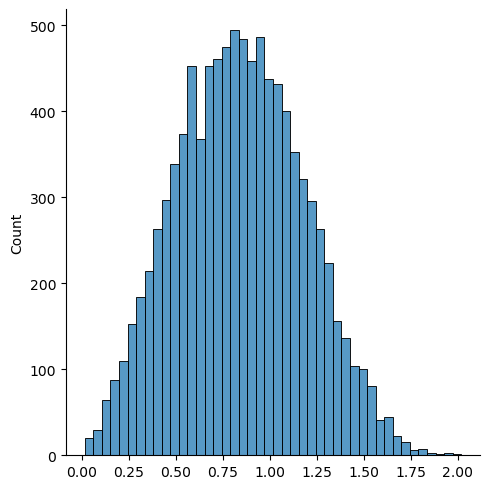

In [141]:
sns.displot(X1**0.5)

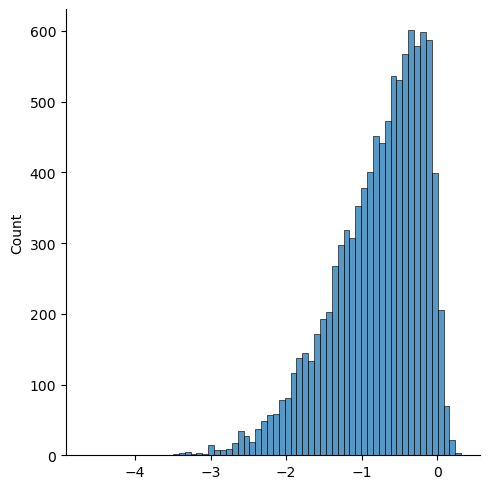

In [132]:
X2 = scipy.stats.skewnorm.rvs(a=-10,size=10000,loc=0)
sns.displot(X2)



In [133]:
scipy.stats.skew(X2)

-0.9571968423786169

In [134]:
scipy.stats.skew(X1)


0.9771581308319341

In [138]:
X1.mean()

0.796222155532782

In [136]:
X2.mean()


-0.7897835299354053

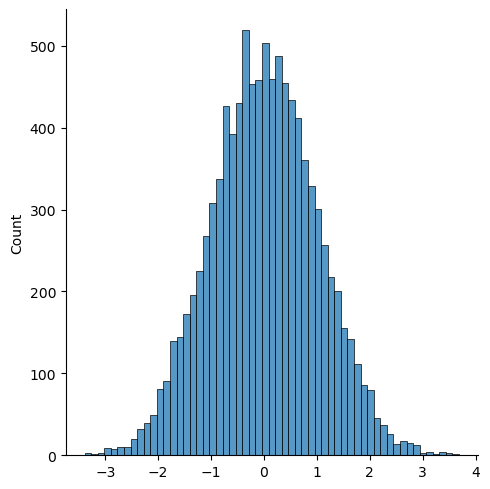

In [144]:
X = scipy.stats.skewnorm.rvs(a=0,size=10000,loc=0)
sns.displot(X)



In [146]:
scipy.stats.kurtosis(X)

-0.08994552048283655

In [147]:
result = scipy.stats.describe(X, ddof=1, bias=False)

In [148]:
result

DescribeResult(nobs=10000, minmax=(-3.3906246163845424, 3.68675754304763), mean=0.008058422964818016, variance=1.0014808713761731, skewness=0.036972363021512494, kurtosis=-0.08939026935464245)

In [150]:
pd.Series(X).describe()

count    10000.000000
mean         0.008058
std          1.000740
min         -3.390625
25%         -0.679891
50%          0.006184
75%          0.681312
max          3.686758
dtype: float64

## Correlation

In [179]:
X = np.random.random(size=100)

Y1 = np.random.random(size=100)

Y2 =   2*X + np.random.random(size=100)
Y3 = - 2*X + np.random.random(size=100)


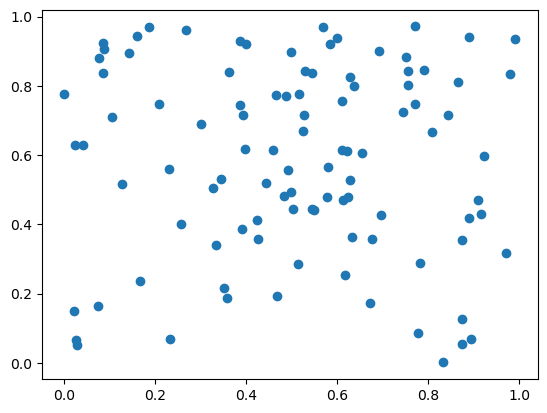

In [180]:
plt.scatter(x=X, y=Y1)

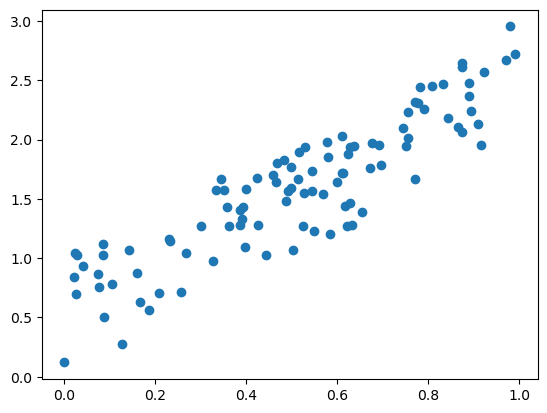

In [181]:
plt.scatter(x=X, y=Y2)


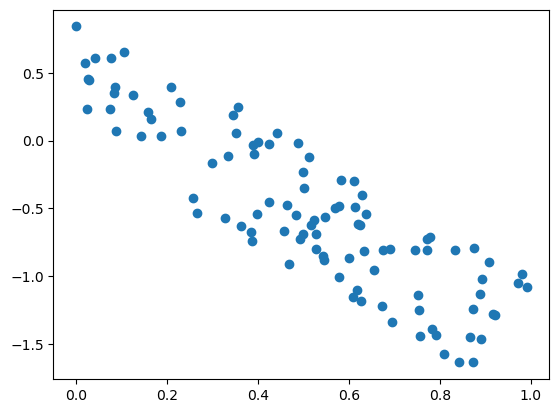

In [182]:
plt.scatter(x=X, y=Y3)


In [184]:
np.cov(X,Y1)

array([[ 0.07214093, -0.0022884 ],
       [-0.0022884 ,  0.07455654]])

In [189]:
np.cov(X,Y2)

array([[0.07214093, 0.14101583],
       [0.14101583, 0.34420234]])

In [195]:
np.cov(X,Y3)[0,1]


-0.14242356588954894

In [196]:
pd.Series(X).cov(pd.Series(Y3))

-0.14242356588954894

In [197]:
X = 10*np.random.random(size=100)

Y1 = np.random.random(size=100)

Y2 =   2*X + np.random.random(size=100)
Y3 = - 2*X + np.random.random(size=100)


In [199]:
np.cov(X,Y3)

array([[  9.05511956, -18.25025845],
       [-18.25025845,  36.86652066]])

In [201]:
X = np.random.random(size=100)

Y1 = np.random.random(size=100)

Y2 =   2*X + np.random.random(size=100)
Y3 = - 2*X + np.random.random(size=100)


In [206]:
cov_xy = np.cov(X,Y2)[0,1]

In [211]:
# np.cov(X,Y2)

In [207]:
cov_xy / (X.std()* Y2.std())

0.9016690024909569

In [208]:
X = 10*np.random.random(size=100)

Y1 = np.random.random(size=100)

Y2 =   2*X + np.random.random(size=100)
Y3 = - 2*X + np.random.random(size=100)


In [212]:
cov_xy = np.cov(X,Y2)[0,1]

In [214]:
cov_xy /(X.std(ddof=1)*Y2.std(ddof=1))

0.998544346192318

In [215]:
np.corrcoef(X,Y3)

array([[ 1.        , -0.99856818],
       [-0.99856818,  1.        ]])

In [217]:
np.corrcoef(X,Y2)[0,1]

0.998544346192318

In [219]:
scipy.stats.linregress(X,Y2).rvalue

0.9985443461923177

## 2D 

In [225]:
df = pd.DataFrame(
    {"A": X,
    "B": Y1,
    "C" : Y2
    }
)

In [230]:
df.head()

,A,B,C
0,5.166955,0.058597,11.267891
1,3.542148,0.990621,7.982328
2,4.845371,0.901345,9.818547
3,8.259004,0.428759,17.366118
4,3.484252,0.049063,7.237471


In [226]:
df.describe()

,A,B,C
count,100.000000,100.000000,100.000000
mean,4.856642,0.502498,10.249756
std,2.873526,0.307342,5.796909
min,0.067913,0.010682,0.303171
25%,1.943755,0.233904,4.431082
50%,5.186613,0.465354,11.168247
75%,7.408620,0.800412,15.102990
max,9.817812,0.999788,19.976340


In [231]:
np.mean(df, axis=0)

A     4.856642
B     0.502498
C    10.249756
dtype: float64

In [232]:
df.median()

A     5.186613
B     0.465354
C    11.168247
dtype: float64

In [236]:
scipy.stats.gmean(df, axis=0)

array([3.48581861, 0.37182878, 7.88352686])

In [237]:
scipy.stats.hmean(df, axis=0)


array([1.49697598, 0.20160968, 4.76816851])

In [238]:
scipy.stats.describe(df)

DescribeResult(nobs=100, minmax=(array([0.06791315, 0.01068201, 0.30317073]), array([ 9.8178121 ,  0.99978796, 19.97634001])), mean=array([ 4.8566421 ,  0.50249773, 10.24975561]), variance=array([ 8.25715132,  0.0944593 , 33.60415158]), skewness=array([-0.10442058,  0.11689638, -0.09686129]), kurtosis=array([-1.25304952, -1.29517983, -1.26426097]))

In [239]:
df.corr()

,A,B,C
A,1.000000,-0.094634,0.998544
B,-0.094634,1.000000,-0.098622
C,0.998544,-0.098622,1.000000


<Axes: >

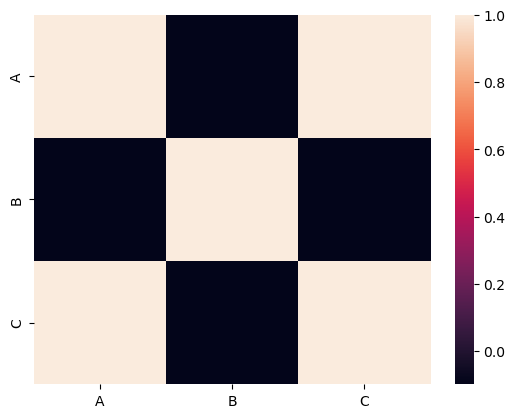

In [240]:
sns.heatmap(df.corr())